# Neural Networks and Deep 
## Learning Problem Set 1 
### Generate Some Data

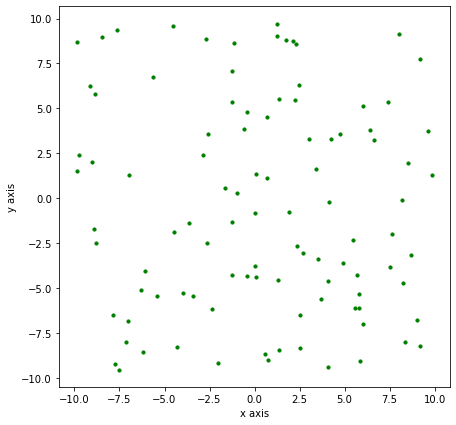

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# generate two vectors of random numbers in the interval [-10,10]
# set random number seed for X
np.random.seed(1234)
X=np.random.uniform(-10, 10, 100)
# set random number seed for Y
np.random.seed(4321)
Y=np.random.uniform(-10, 10, 100)

# plot the distribution of the generated 100 points
plt.figure(num = 1,figsize = (7,7))
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.scatter(X,Y,color='green',s=10)
plt.show()

### Choose a Target Function

I choose the line 3x+2y-9=0 to separate the data.

In [2]:
# use two list to record the classification of 100 points
success=[]
failture=[]
for i in range(len(X)):
    if(3*X[i]+2*Y[i]-9>0):
        success.append(i)
    else:
        failture.append(i)

# check how many points are classified as success
print(len(success))
# what are those points?
print(success)

35
[1, 7, 8, 9, 13, 15, 18, 19, 20, 21, 24, 25, 30, 31, 37, 38, 39, 45, 47, 51, 55, 57, 58, 67, 70, 71, 75, 81, 82, 84, 87, 91, 93, 97, 99]


### Plot Your Data

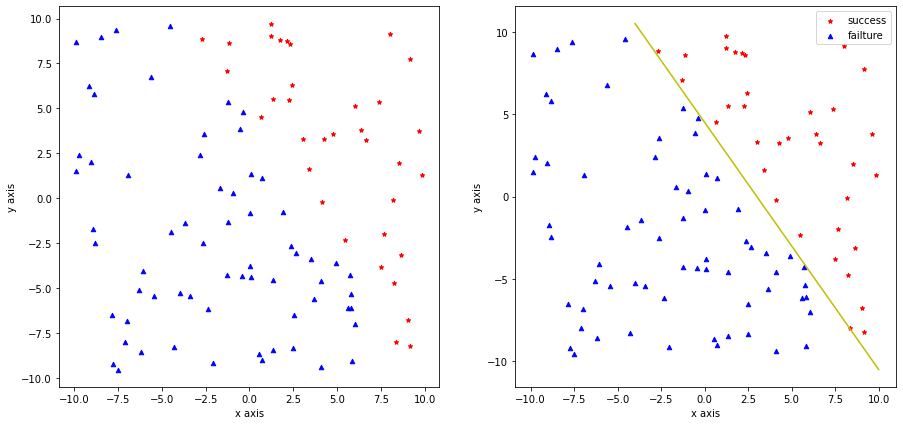

In [3]:
# plot the classification results
plt.figure(num = 2,figsize = (15,7))
plt.subplot(121)
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.scatter(X[success],Y[success],color='r',marker='*', s=20)
plt.scatter(X[failture],Y[failture],color='b',marker='^', s=20)

# plot the classification results + the chosen line
plt.subplot(122)
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.scatter(X[success],Y[success],color='r',marker='*', s=20, label='success')
plt.scatter(X[failture],Y[failture],color='b',marker='^', s=20, label='failture')
#plot the chosen line
a = np.linspace(-4,10)
b = 1.5*(3-a)
plt.plot(a,b,color='y')
plt.legend(loc='upper right')

plt.show()

### Create the Training Data

In [4]:
import pandas as pd
# mark the classification results with the target list
target=[]
j=0
for i in range(100):
    if(i==success[j]):
        target.append(1)
        j=j+1
    else:
        target.append(-1)

# package X,Y and target together into a data frame
df=pd.DataFrame(X, columns=['x1'])
df=pd.concat([df, pd.DataFrame(Y,columns=['x2'])],axis=1)
df=pd.concat([df, pd.DataFrame(target,columns=['y'])],axis=1)
df

,x1,x2,y
0,-6.169611,-8.583942,-1
1,2.442175,6.301280,1
2,-1.245445,5.358099,-1
3,5.707172,-4.272910,-1
4,5.599516,-6.138114,-1
...,...,...,...
95,0.051191,-3.762471,-1
96,0.737564,-8.996644,-1
97,6.384041,3.803946,1
98,-8.857687,5.779037,-1


### Initialize the Perceptron

In [5]:
# set W(0)=[0,0,0]
W=[0,0,0]

# write my perceptron function
def f(x,y,W):
    if(W[0]+W[1]*x+W[2]*y>=0):
        return 1
    else:
        return -1

### Classify the Data

In [6]:
def predect(W,f,df):
    pred=[]
    for i in range(df.shape[0]):
        pred.append(f(df.x1[i],df.x2[i],W))
    return pred

pred=predect(W,f,df)
# check classification results
print(pred)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


### Generate the Confusion Matrix

In [7]:
# yp = predicted  ya = actual
def get_cm(yp,ya):
    '''this function use Predicted vector and Actual vector to calculate confusion matrix'''
    TT,TF,FT,FF=0,0,0,0
    for i in range(len(yp)):
        if((yp[i]==1)and(ya[i]==1)):
            TT=TT+1
        elif((yp[i]==1)and(ya[i]==-1)):
            TF=TF+1
        elif((yp[i]==-1)and(ya[i]==1)):
            FT=FT+1
        elif((yp[i]==-1)and(ya[i]==-1)):
            FF=FF+1
    return [[TT,TF],[FT,FF]]
cm=get_cm(pred,df.y)
cm

[[35, 65], [0, 0]]

### Evaluate the Result

In [8]:
def get_acc(cm):
    '''this function use confusion matrix to calculate classification accuracy'''
    return (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
acc=get_acc(cm)
acc

0.35

### Update the Weights

In [9]:
import random

def update_w(W,yp,df):
    l=[i for i in range(len(yp))]
    random.shuffle(l)
    for i in range(len(l)):
        if(yp[l[i]]!=df.y[l[i]]):
            y=df.y[l[i]]
            x1=df.x1[l[i]]
            x2=df.x2[l[i]]
            return [W[0]+y,W[1]+x1*y,W[2]+x2*y]  
    return W         

In [10]:
W=update_w(W,pred,df)
W

[-1, 5.415628690787642, 5.44050198471502]

### Classify the Data

In [11]:
pred=predect(W,f,df)
print(pred)

[-1, 1, 1, 1, -1, 1, -1, 1, 1, 1, -1, -1, -1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, -1, -1, 1, 1, -1, -1, -1, -1, 1, 1, 1, 1, -1, -1, -1, -1, 1, 1, -1, 1, -1, 1, -1, 1, -1, -1, -1, 1, -1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, 1, 1, 1, 1, -1, -1, 1, -1, 1, -1, -1, -1, 1, 1, -1, 1, -1, 1, 1, -1, -1, -1, 1, -1, 1, 1, -1, -1, 1, -1, 1]


### Generate the Confusion Matrix

In [12]:
cm=get_cm(pred,df.y)
cm

[[35, 14], [0, 51]]

In [13]:
acc=get_acc(cm)
acc

0.86

The accuracy rate is only 86%, so repeat the above three steps until my accuracy reach 100%

In [14]:
for i in range(10000):
    W1=update_w(W,pred,df)
    if(W1==W):
        print(i)
        break
    pred=predect(W1,f,df)
    cm=get_cm(pred,df.y)
    acc=get_acc(cm)
    W=W1

87


In [15]:
print(W)
print(cm)
print(acc)

[-42, 14.605393935717746, 9.958101238320866]
[[35, 0], [0, 65]]
1.0


After 87 iterations, the weight vector W converges to [-42, 14.605393935717746, 9.958101238320866], and the classification accuracy of the perceptron reaches 100%, then I plot the result

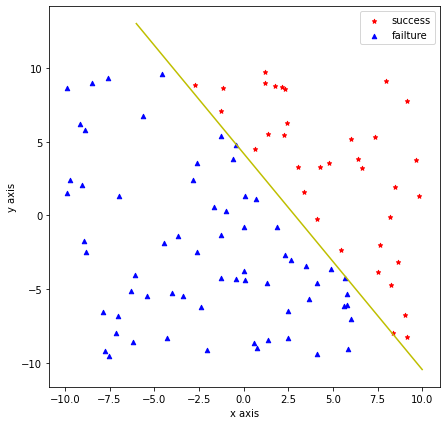

In [16]:
plt.figure(num = 3,figsize = (7,7))
# plot the classification results + the chosen line
plt.xlabel("x axis")
plt.ylabel("y axis")
Xs=[]
Ys=[]
for i in range(len(df.y)):
    if(pred[i]==1):
        Xs.append(df.x1[i])
        Ys.append(df.x2[i])
Xf=[]
Yf=[]
for i in range(len(df.y)):
    if(pred[i]==-1):
        Xf.append(df.x1[i])
        Yf.append(df.x2[i])
plt.scatter(Xs,Ys,color='r',marker='*', s=20, label='success')
plt.scatter(Xf,Yf,color='b',marker='^', s=20, label='failture')
#plot the chosen line
a = np.linspace(-6,10)
b = -W[1]*a/W[2]-W[0]/W[2]
plt.plot(a,b,color='y')
plt.legend(loc='upper right')

plt.show()

### Deploy the Model

Generate 30 more test data

In [17]:
np.random.seed(123)
Xm=np.random.uniform(-10, 10, 30)
np.random.seed(321)
Ym=np.random.uniform(-10, 10, 30)
T=[]
for i in range(len(Xm)):
    if(3*Xm[i]+2*Ym[i]-9>0):
        T.append(1)
    else:
        T.append(-1)
# package Xm,Ym and T together into a data frame
df_m=pd.DataFrame(Xm, columns=['x1'])
df_m=pd.concat([df_m, pd.DataFrame(Ym,columns=['x2'])],axis=1)
df_m=pd.concat([df_m, pd.DataFrame(T,columns=['y'])],axis=1)
df_m

,x1,x2,y
0,3.929384,7.718959,1
1,-4.277213,-8.441753,-1
2,-5.462971,9.592923,-1
3,1.026295,-5.046571,-1
4,4.389379,5.057694,1
5,-1.537871,0.533513,-1
6,9.615284,8.151075,1
7,3.696595,7.681406,1
8,-0.381362,-8.214621,-1
9,-2.157650,0.346892,-1


In [18]:
pred=predect(W,f,df_m)
cm=get_cm(pred,df_m.y)
acc=get_acc(cm)
print(acc)
print(W)
print(cm)

1.0
[-42, 14.605393935717746, 9.958101238320866]
[[8, 0], [0, 22]]


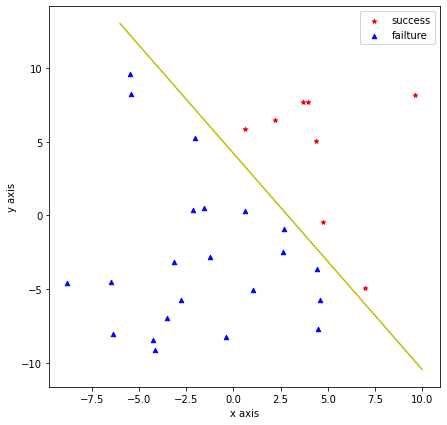

In [19]:
plt.figure(num = 4,figsize = (7,7))
# plot the classification results + the chosen line
plt.xlabel("x axis")
plt.ylabel("y axis")
Xs=[]
Ys=[]
for i in range(len(df_m.y)):
    if(pred[i]==1):
        Xs.append(df_m.x1[i])
        Ys.append(df_m.x2[i])
Xf=[]
Yf=[]
for i in range(len(df_m.y)):
    if(pred[i]==-1):
        Xf.append(df_m.x1[i])
        Yf.append(df_m.x2[i])
plt.scatter(Xs,Ys,color='r',marker='*', s=20, label='success')
plt.scatter(Xf,Yf,color='b',marker='^', s=20, label='failture')
#plot the chosen line
a = np.linspace(-6,10)
b = -W[1]*a/W[2]-W[0]/W[2]
plt.plot(a,b,color='y')
plt.legend(loc='upper right')

plt.show()

I get 100% accuracy on the new data set.